In [1]:
import os
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from openpyxl.utils import get_column_letter

ruta_carpeta = "/Users/Usuario/OneDrive/Escritorio/tfg/probeta 1/"
num_ensayos=11
nombres_archivos = [f"ENSAYO_{i}.xlsx" for i in range(num_ensayos)]

# Intervalo de frecuencias de cada canal
intervalo_canales = [
    (4, 804),      
    (810, 1610),   
    (1616, 2416),
    (2422, 3222),
    (3228, 4028),
    (4034, 4834),
    (4840, 5640),
    (5646, 6446),
    (6452, 7252),
    (7258, 8058)
]
# Definir las columnas de frecuencia, parte real y parte imaginaria para cada rango
frecuencia_col = [1, 4, 7, 10, 13, 16, 19, 22, 25]  # A, D, J
real_col = [2, 5, 8, 11, 14, 17, 20, 23, 26]  # B, E, K
imagin_col = [3, 6, 9, 12, 15, 18, 21, 24, 27]  # C, F, L
# Convertimos estas a letras para el print
frecuencia_col_letras = [get_column_letter(col) for col in frecuencia_col]
real_col_letras = [get_column_letter(col) for col in real_col]
imagin_col_letras = [get_column_letter(col) for col in imagin_col]

In [2]:
# Obtenemos las partes reales e imagin separadas por ensayo, hojas, canales y rangos)
data_frecuencias = []
data_partes_reales = []
data_partes_imagin = []
for ensayo_idx, nombre_archivo in enumerate(nombres_archivos):
    ruta_archivo = os.path.join(ruta_carpeta, nombre_archivo)
    wb = openpyxl.load_workbook(ruta_archivo)
#CARGAMOS EL PRIMER ENSAYO Y SUS HOJAS DE BARRIDOS
#wb = openpyxl.load_workbook('/Users/Usuario/OneDrive/Escritorio/tfg/probeta 1/ENSAYO_0.xlsx')
    sweep1=wb['Sweep_1']
    sweep2=wb['Sweep_2']
    sweep3=wb['Sweep_3']
    
    sweeps = [sweep1, sweep2, sweep3]
    
    if ensayo_idx == 0:  # Solo se almacena una vez porque las frecuencias no cambian entre ensayos
        for col in frecuencia_col:
            column_data = [sweeps[0].cell(row=i, column=col).value for i in range(4, 805)]
            data_frecuencias.append(column_data)

    ensayo_partes_reales = []
    ensayo_partes_imagin = []
    
    for sheet in sweeps:
        sweep_data_reales = []
        sweep_data_imagin = []
        for inicio, fin in intervalo_canales:
            canal_data_reales = []
            canal_data_imagin = []
            for col_r, col_i in zip(real_col, imagin_col):
                column_data_reales = [sheet.cell(row=i, column=col_r).value for i in range(inicio, fin + 1)]
                column_data_imagin = [sheet.cell(row=i, column=col_i).value for i in range(inicio, fin + 1)]
                canal_data_reales.append(column_data_reales)
                canal_data_imagin.append(column_data_imagin)
            sweep_data_reales.append(canal_data_reales)
            sweep_data_imagin.append(canal_data_imagin)
        ensayo_partes_reales.append(sweep_data_reales)
        ensayo_partes_imagin.append(sweep_data_imagin)
    data_partes_reales.append(ensayo_partes_reales)
    data_partes_imagin.append(ensayo_partes_imagin)

In [3]:
# Ahora, imprimir las partes reales y las imaginarias para comprobar la estructura
# print("\nPartes Reales y Partes Imaginarias:")

# Recorremos los datos de partes reales e imaginarias
# for ensayo_idx, (sweep_reales, sweep_imagin) in enumerate(zip(data_partes_reales, data_partes_imagin), start=1):
#     print(f"\nEnsayo {ensayo_idx-1}:")
#     for sweep_idx, (sweep_data_reales, sweep_data_imagin) in enumerate(zip(sweep_reales, sweep_imagin), start=1):
#         print(f"  Barrido {sweep_idx}:")
        
#         for canal_idx, (canal_reales, canal_imagin) in enumerate(zip(sweep_data_reales, sweep_data_imagin), start=1):
#             print(f"    Canal {canal_idx}:")
#             for col_idx, (column_reales, column_imagin) in enumerate(zip(canal_reales, canal_imagin), start=1):
#                 print(f"      Columna {real_col_letras[col_idx-1]}:")
#                 print(f"        Parte Real (primeros 5 valores): {column_reales[:5]}")
#                 print(f"        Parte Imaginaria (primeros 5 valores): {column_imagin[:5]}")


In [4]:
data_frecuencias_np = np.array(data_frecuencias)
data_partes_reales_np = np.array(data_partes_reales)
data_partes_imagin_np = np.array(data_partes_imagin)

In [5]:
data_frecuencias_np.shape

(9, 801)

In [6]:
data_partes_reales_np.shape

(11, 3, 10, 9, 801)

In [7]:
data_partes_imagin_np.shape

(11, 3, 10, 9, 801)

In [9]:
data_partes_reales_np_reshaped = data_partes_reales_np.reshape(data_partes_reales_np.shape[0], data_partes_reales_np.shape[1], data_partes_reales_np.shape[2], -1)
data_partes_imagin_np_reshaped = data_partes_imagin_np.reshape(data_partes_imagin_np.shape[0], data_partes_imagin_np.shape[1], data_partes_imagin_np.shape[2], -1)

print( data_partes_reales_np_reshaped.shape)
print( data_partes_imagin_np_reshaped.shape)

(11, 3, 10, 7209)
(11, 3, 10, 7209)


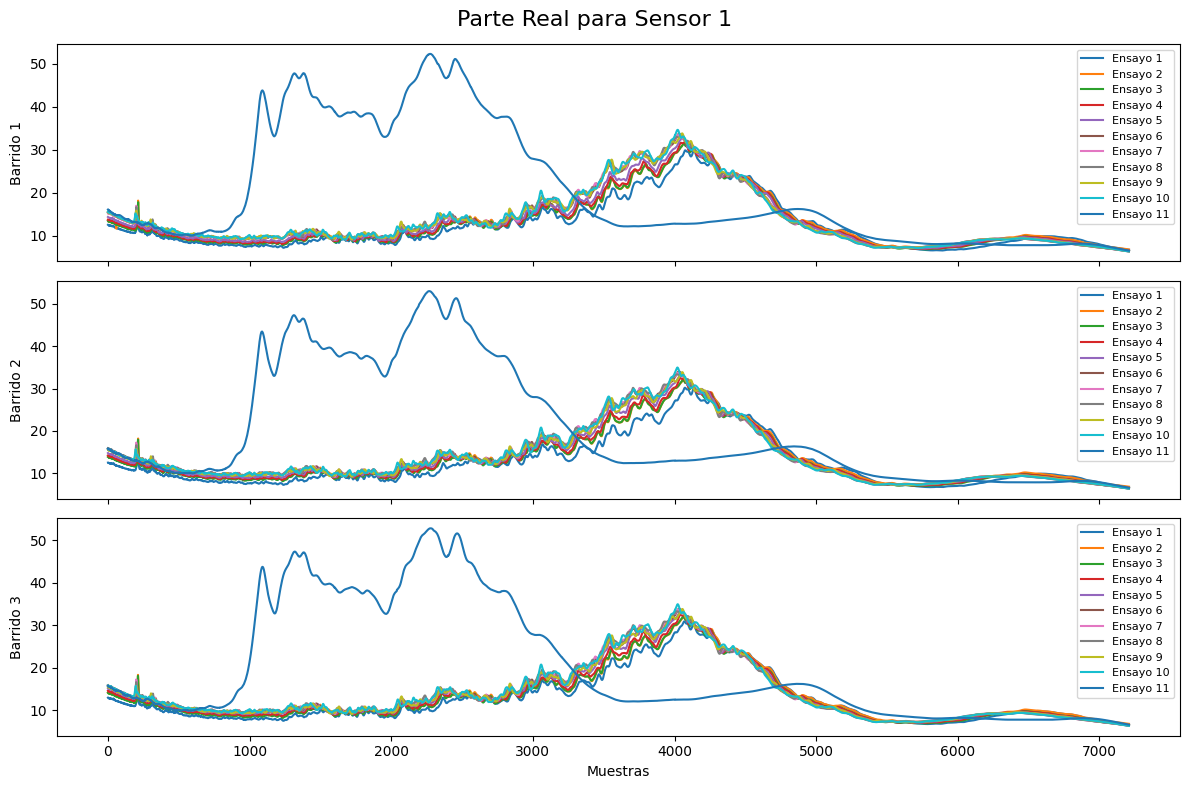

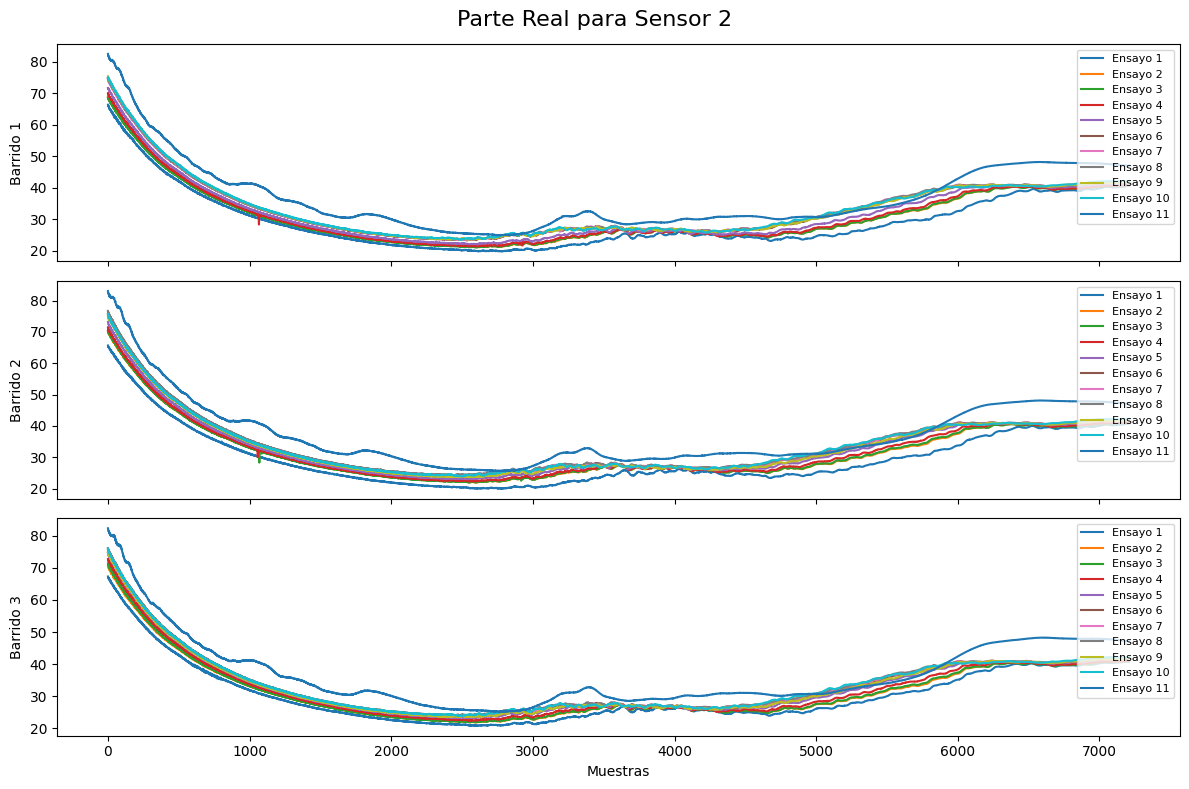

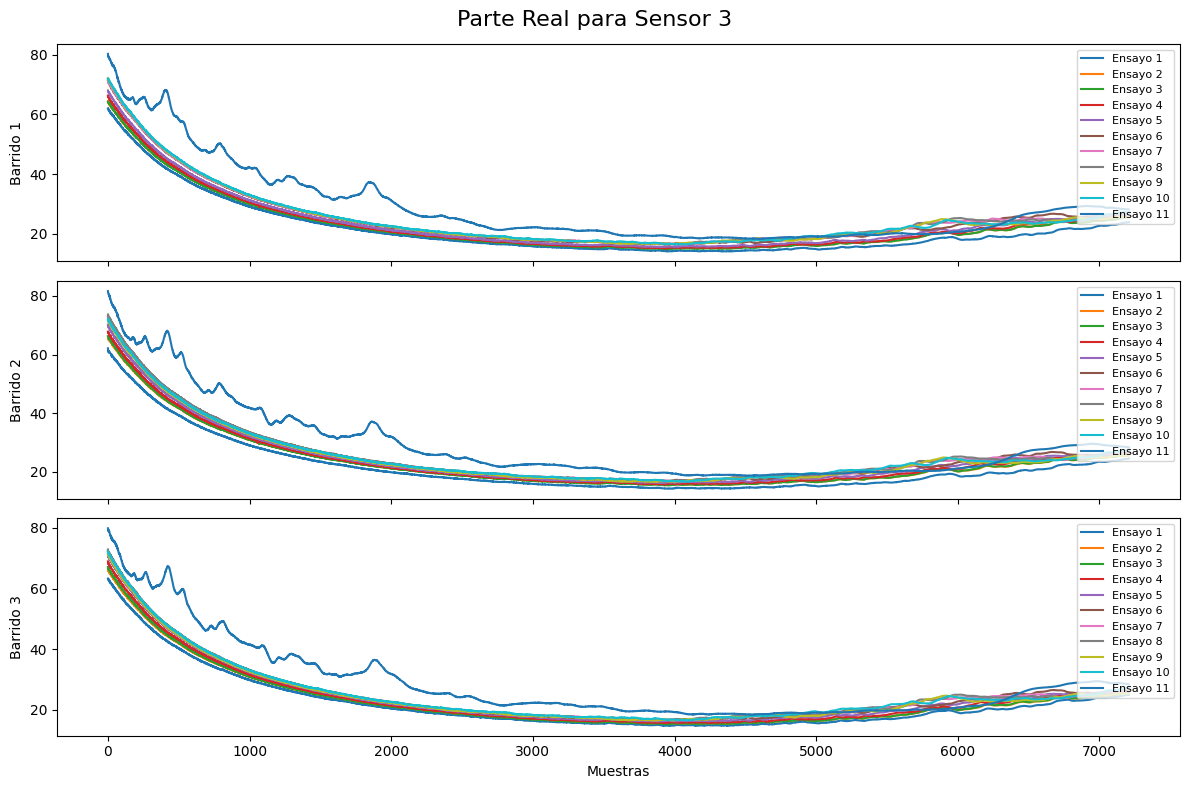

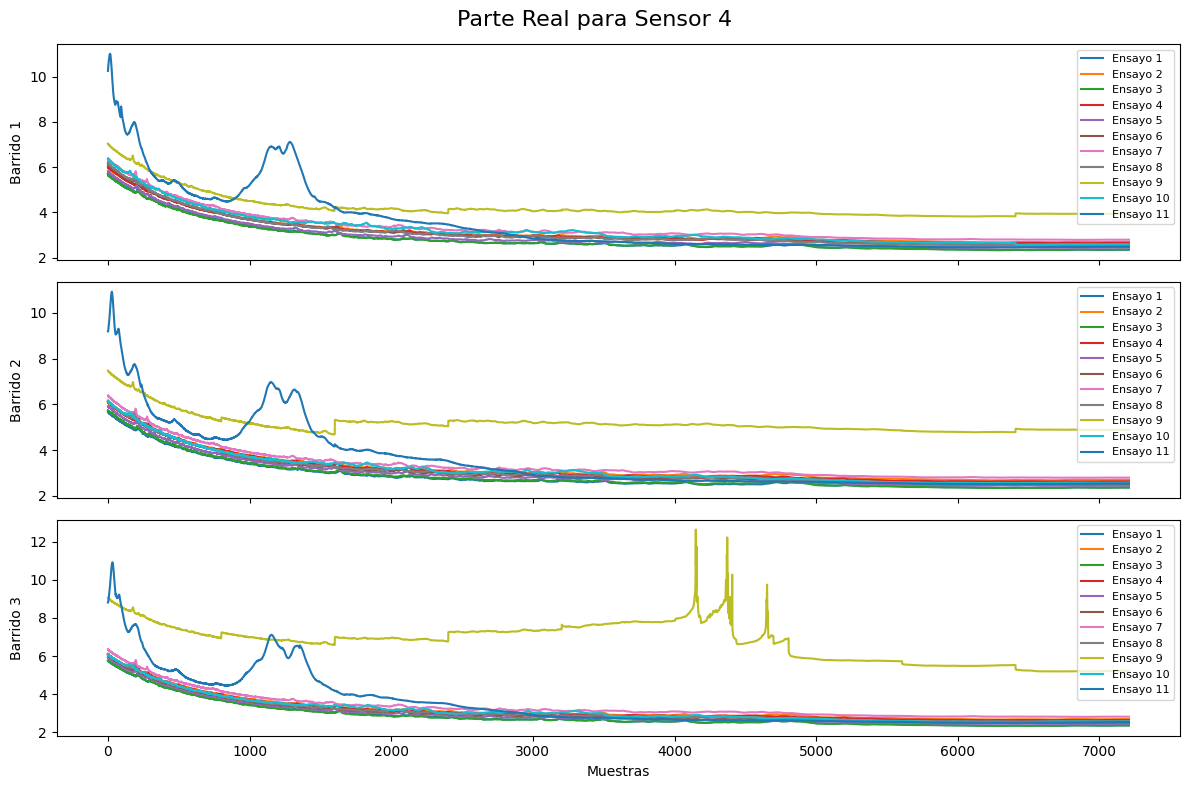

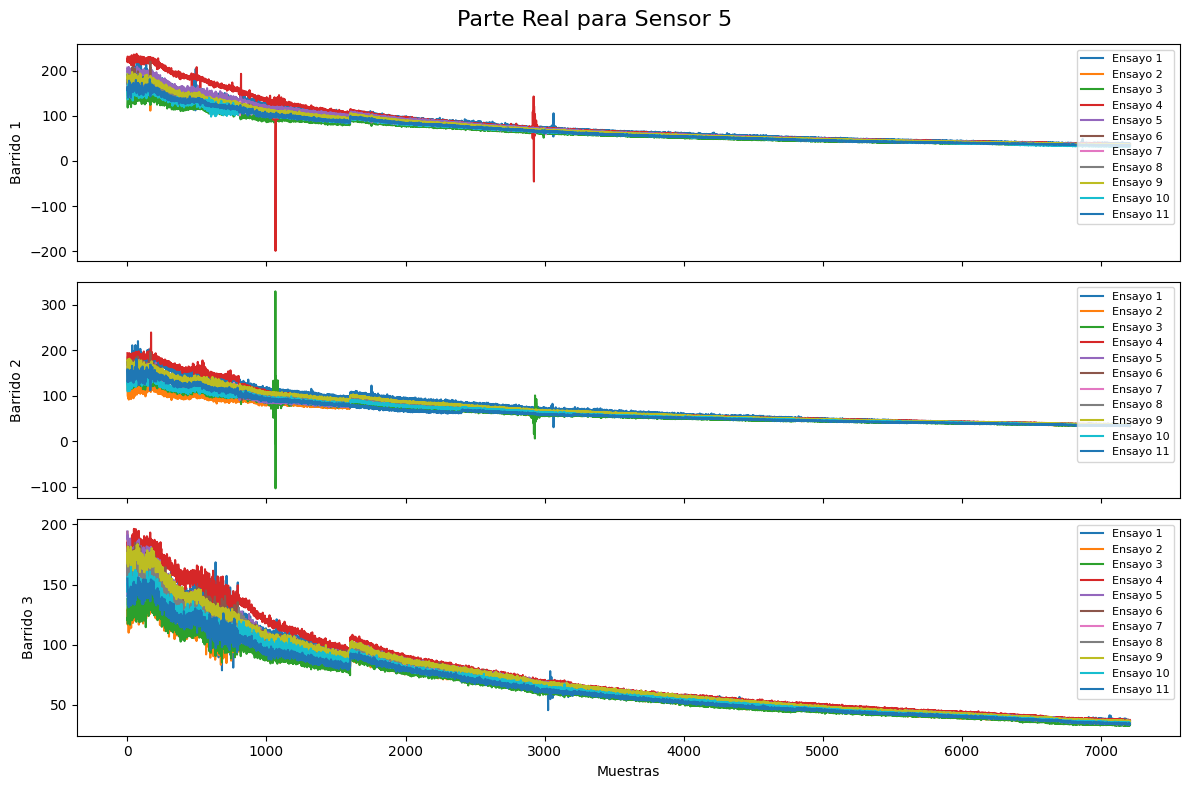

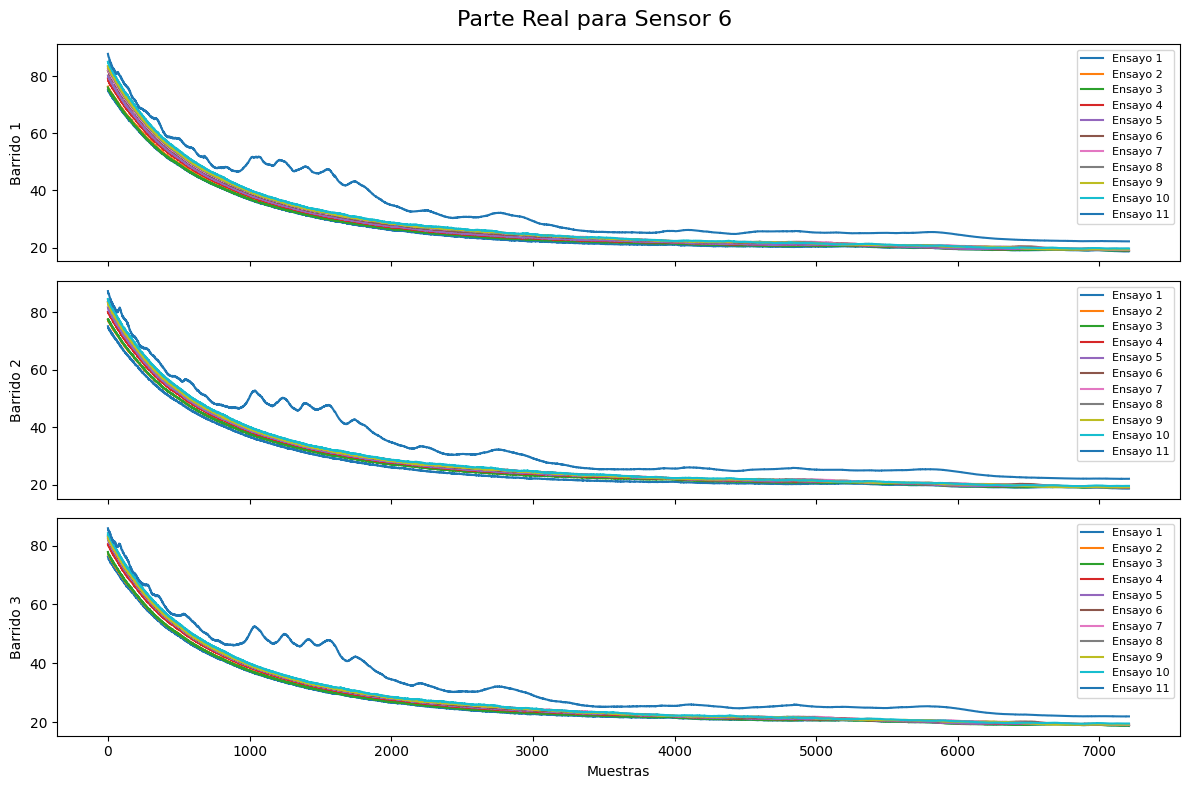

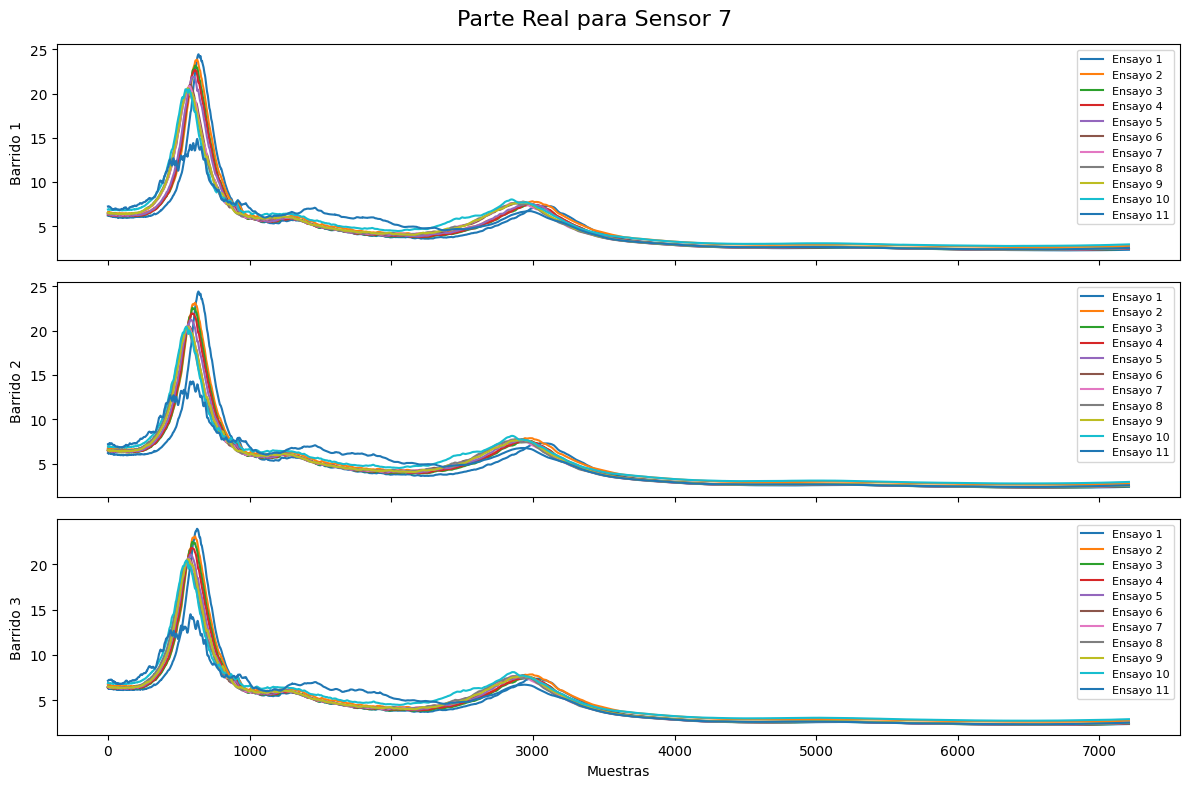

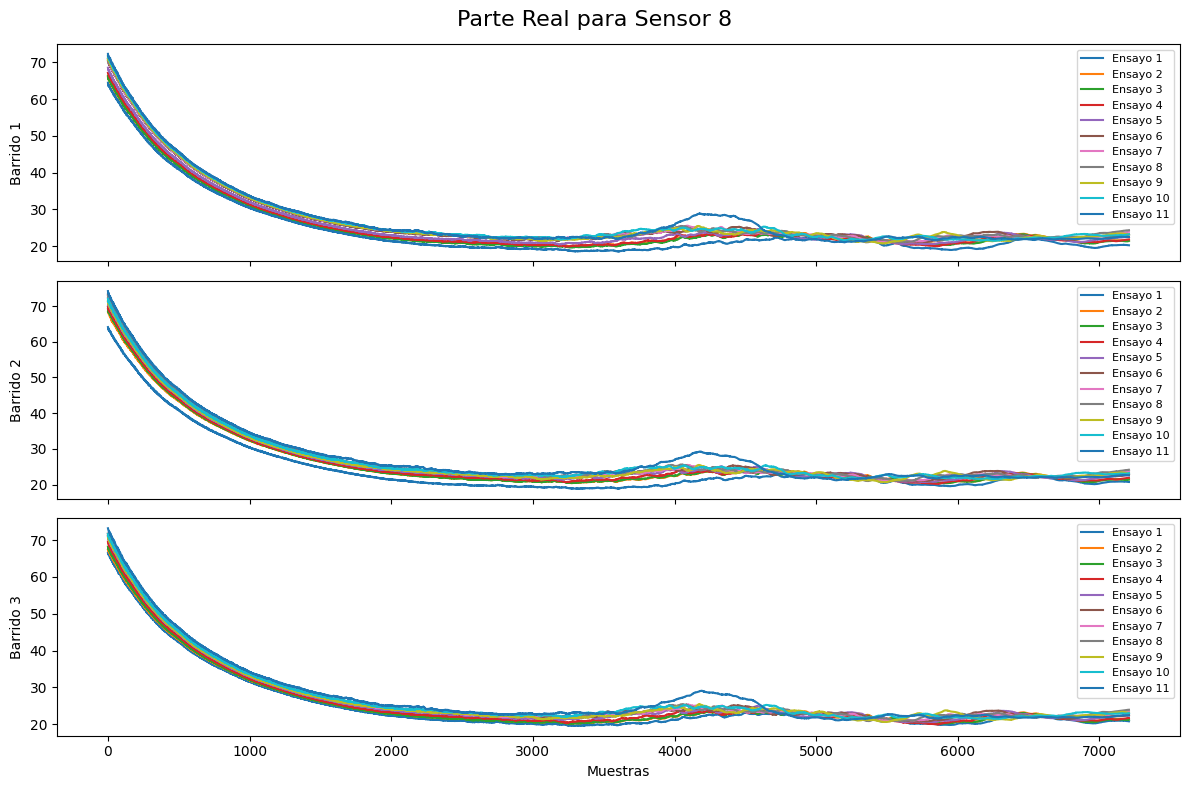

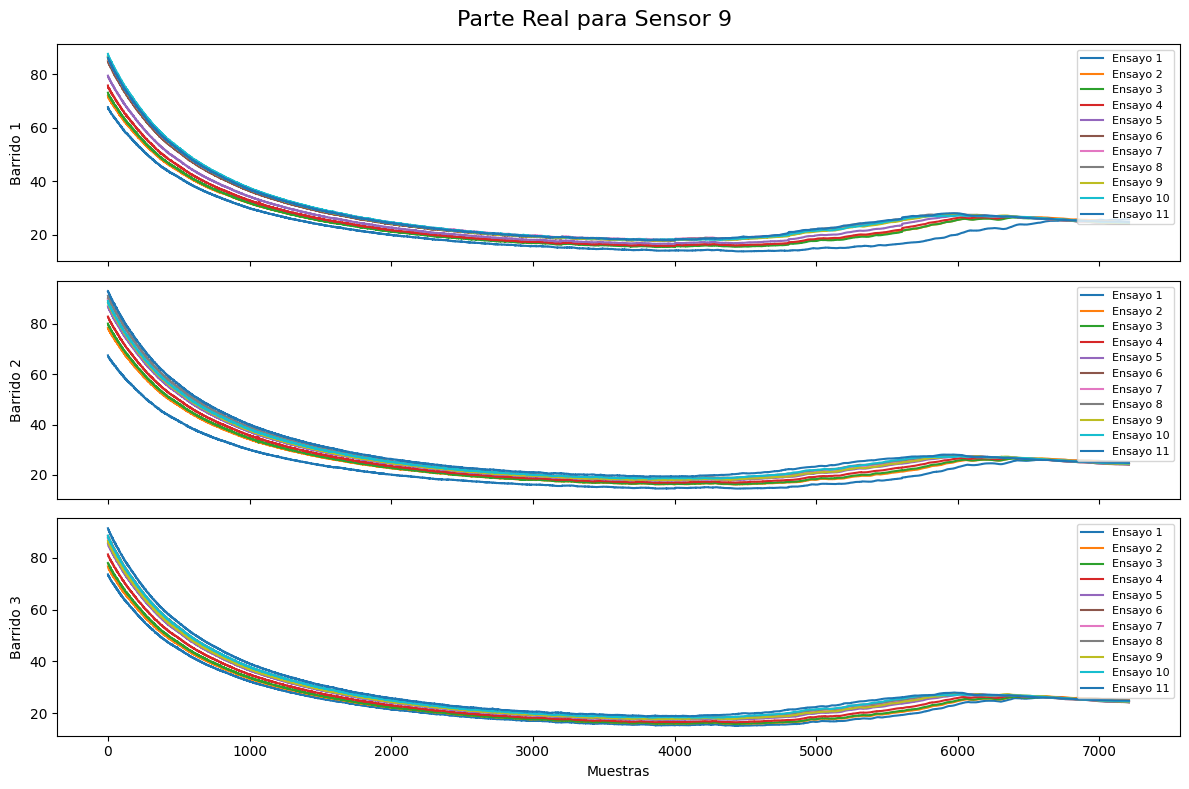

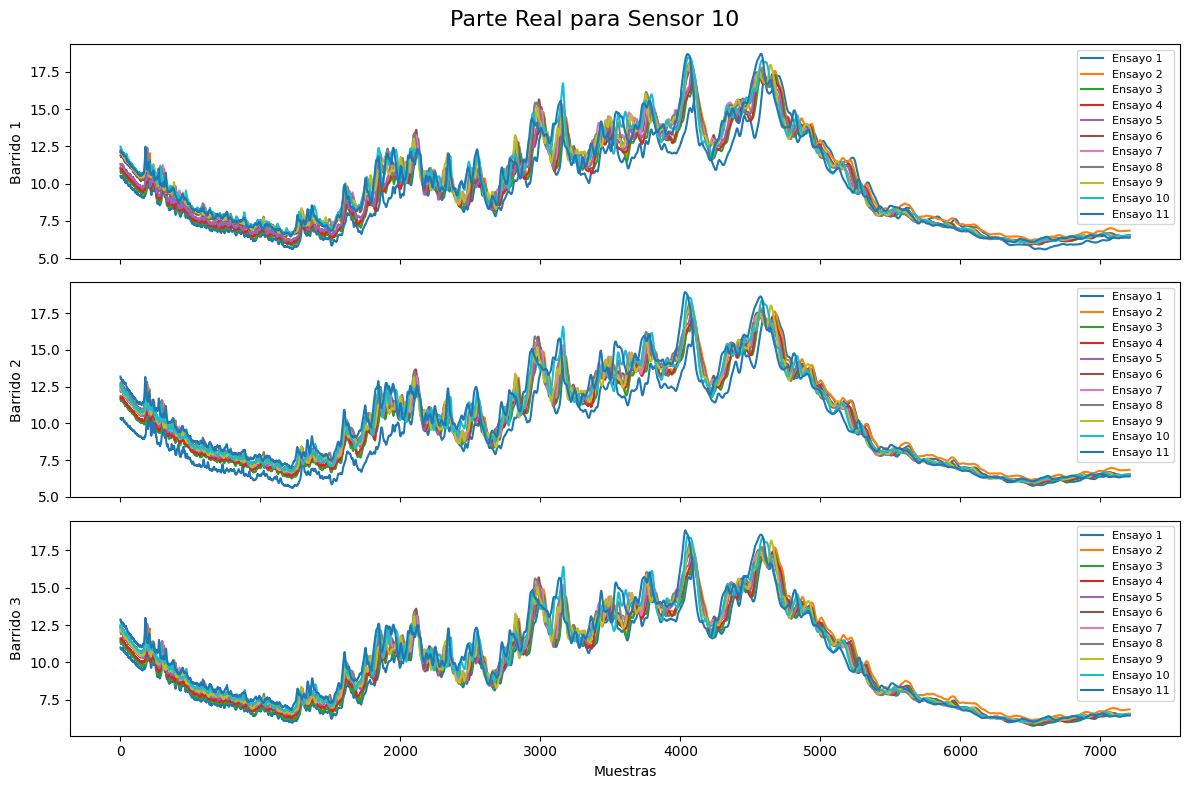

In [19]:
#VISUALIZACIÓN DE SEÑALES: Subplots de las señales separados por sensor, carga y sensor-barrido
n_ensayos, n_barridos, n_sensores, n_puntos = (11, 3, 10, 7209)

# Parte real
for sensor in range(n_sensores):
    fig, axs = plt.subplots(n_barridos, 1, figsize=(12, 8), sharex=True) # Creamos una figura con n_barridos subplots (uno por cada barrido).
    fig.suptitle(f"Parte Real para Sensor {sensor+1}", fontsize=16)
    
    # Iteramos sobre cada barrido
    for barrido in range(n_barridos):
        ax = axs[barrido]  
        for ensayo in range(n_ensayos):
            ax.plot(data_partes_reales_np_reshaped[ensayo, barrido, sensor, :], label=f"Ensayo {ensayo+1}")
        
        ax.set_ylabel(f"Barrido {barrido+1}")
        ax.legend(fontsize=8, loc="upper right")
    
    axs[-1].set_xlabel("Muestras")
    plt.tight_layout()
    plt.show()

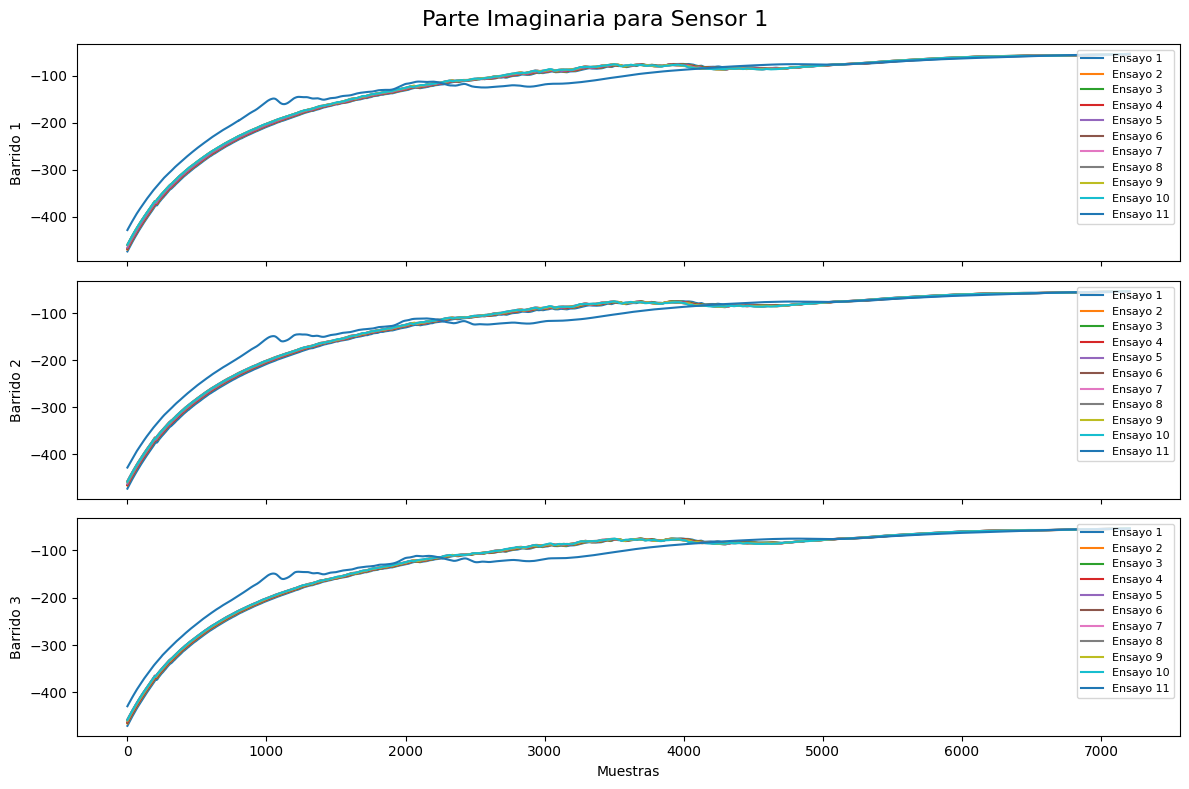

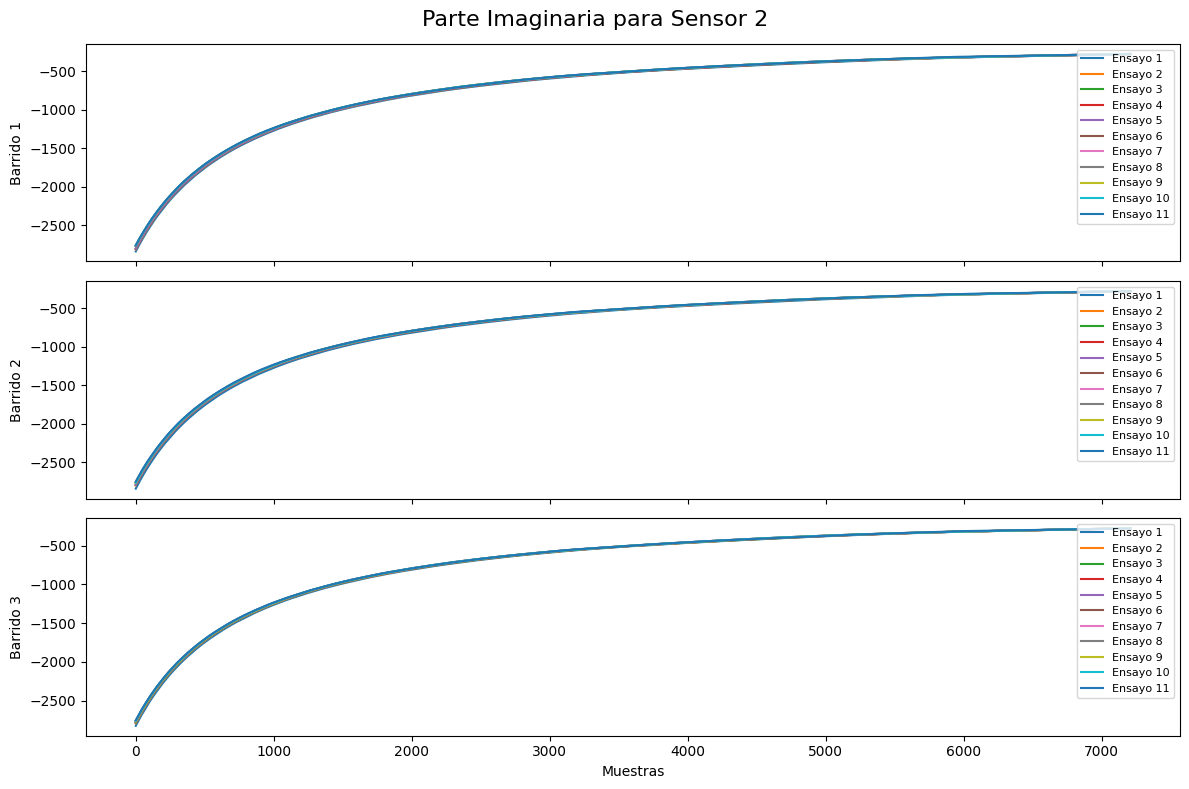

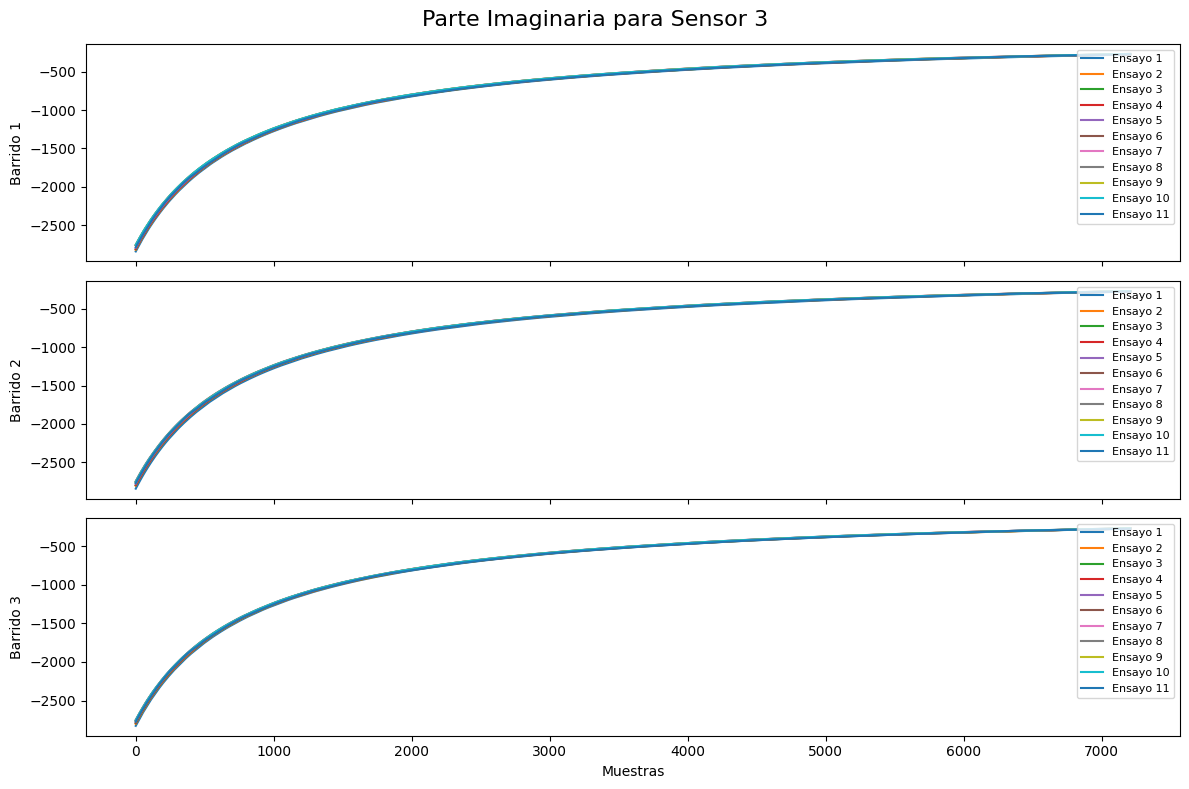

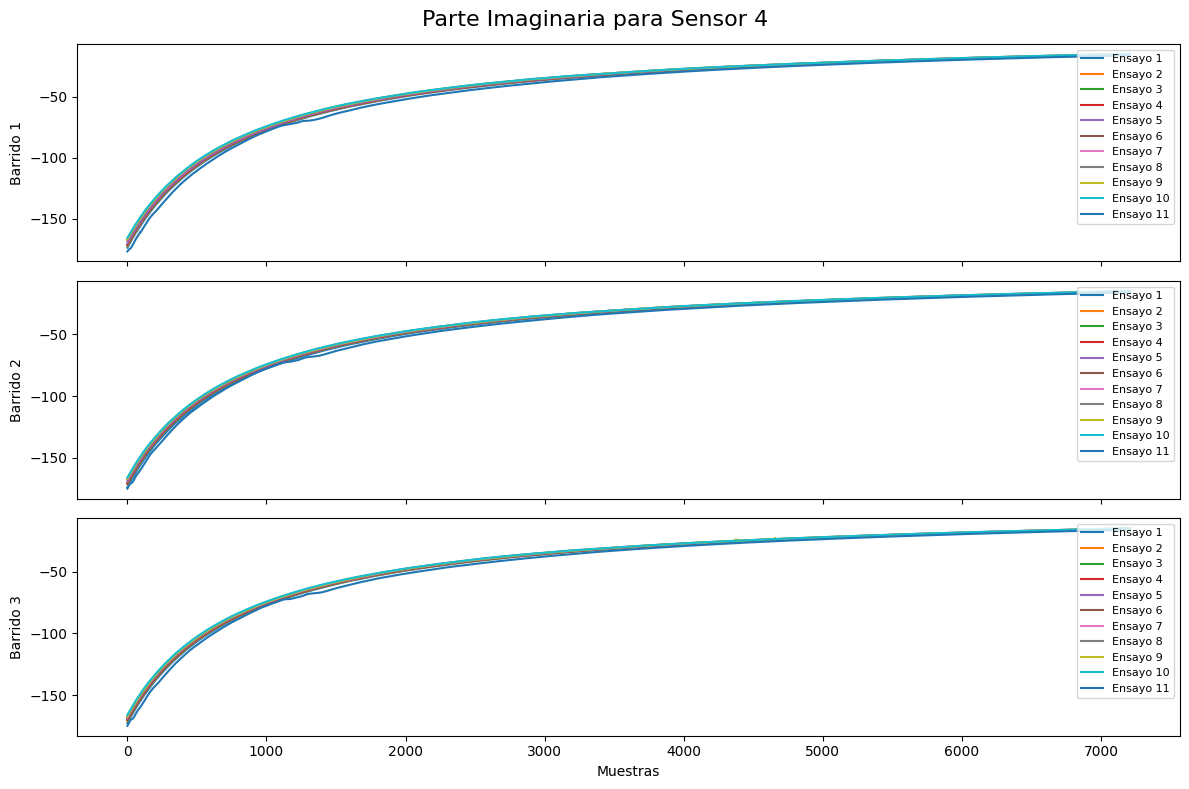

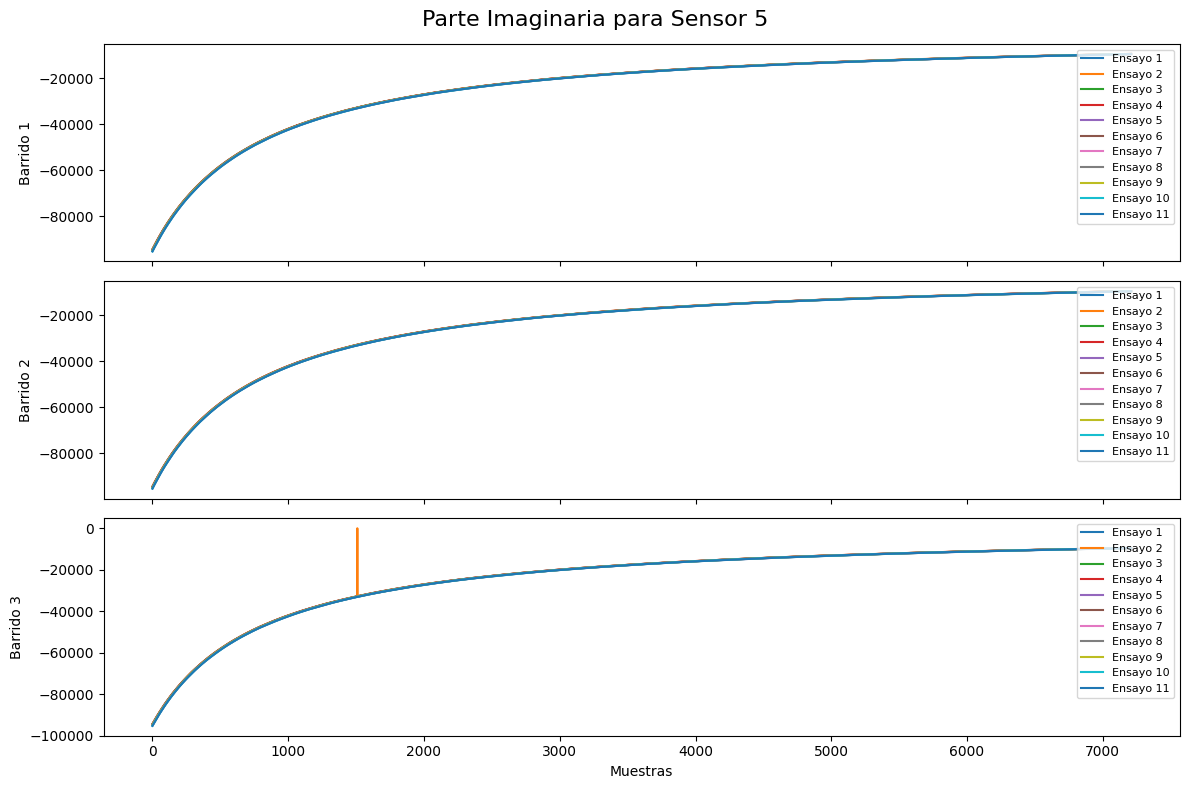

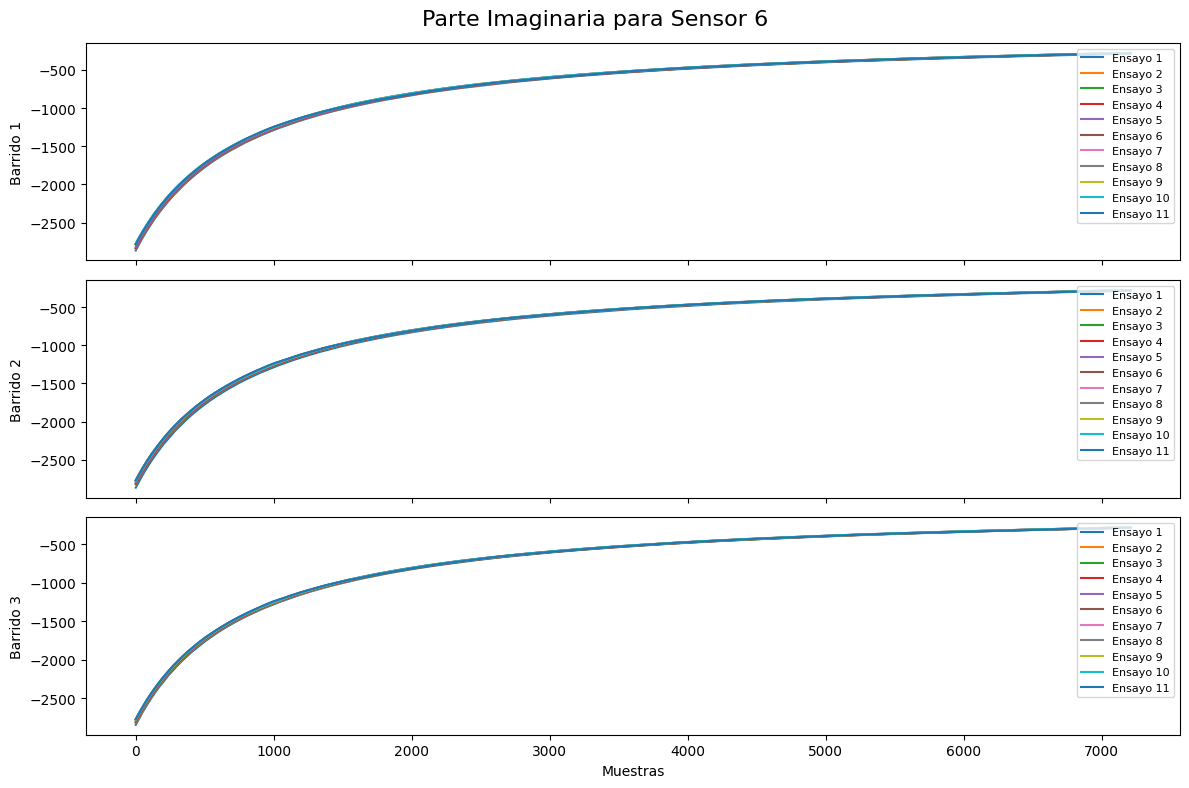

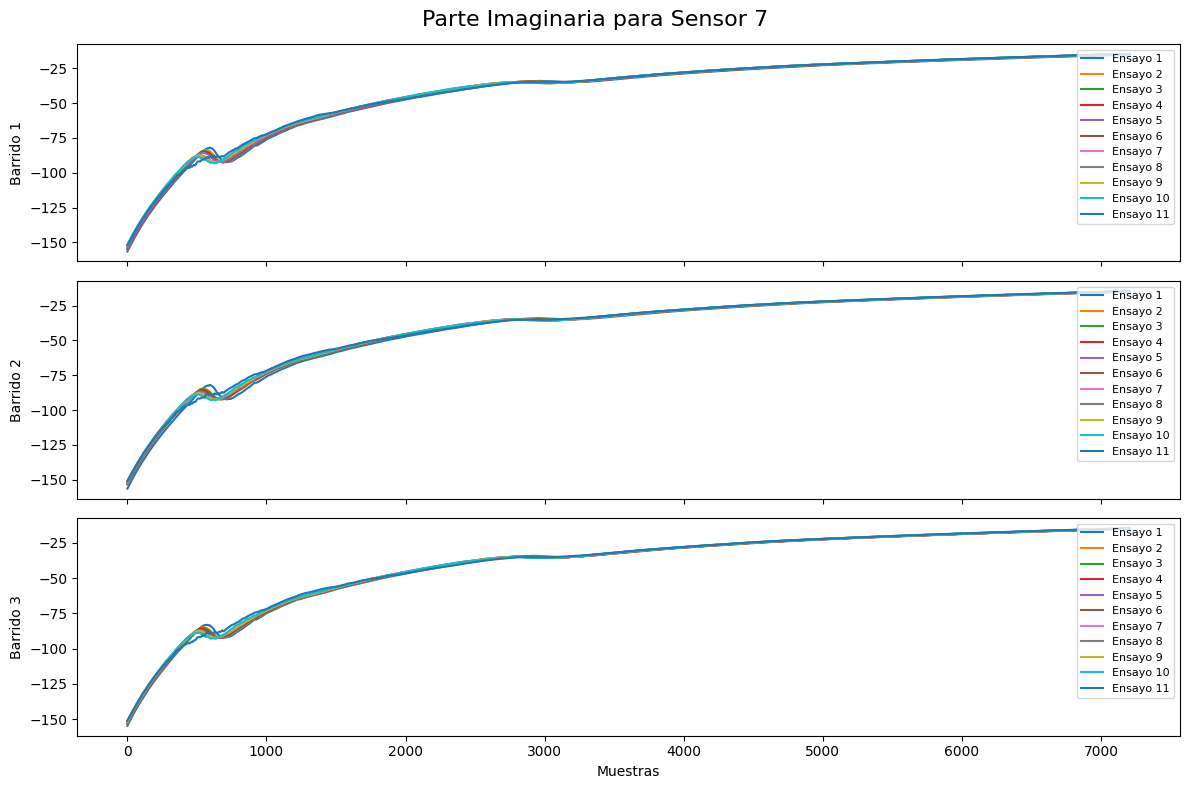

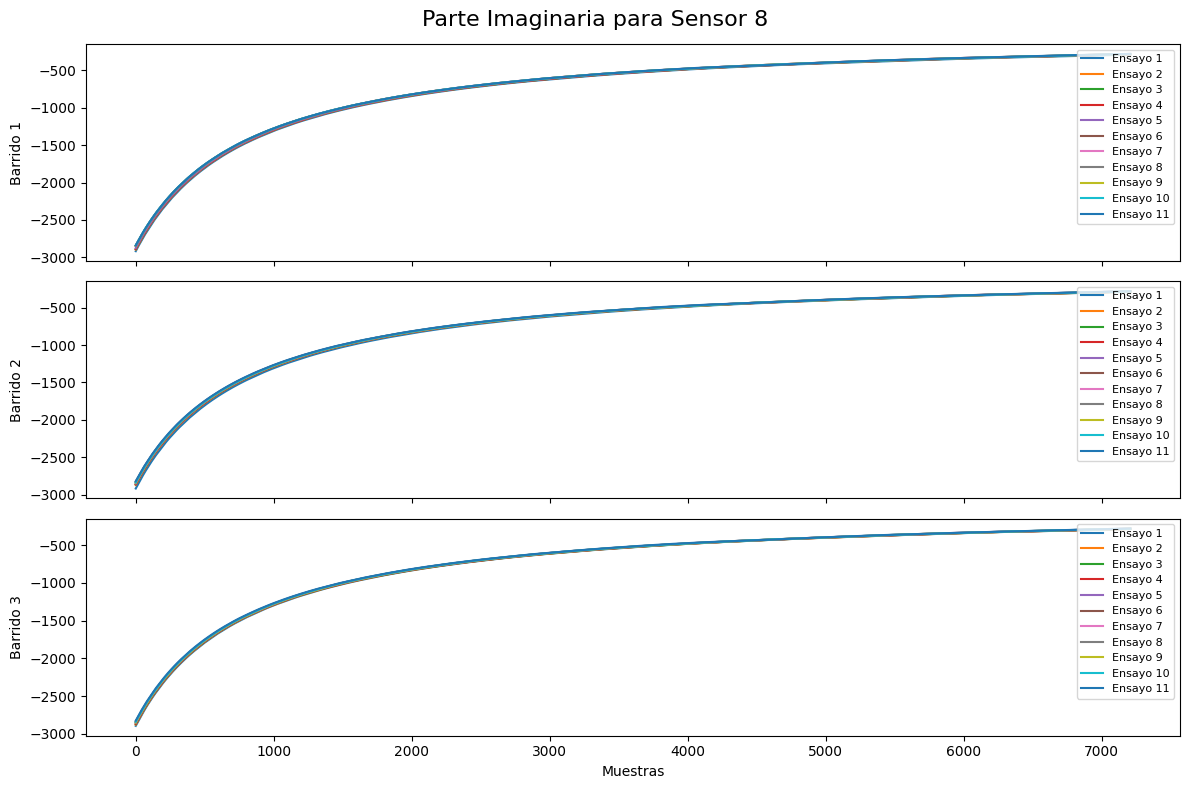

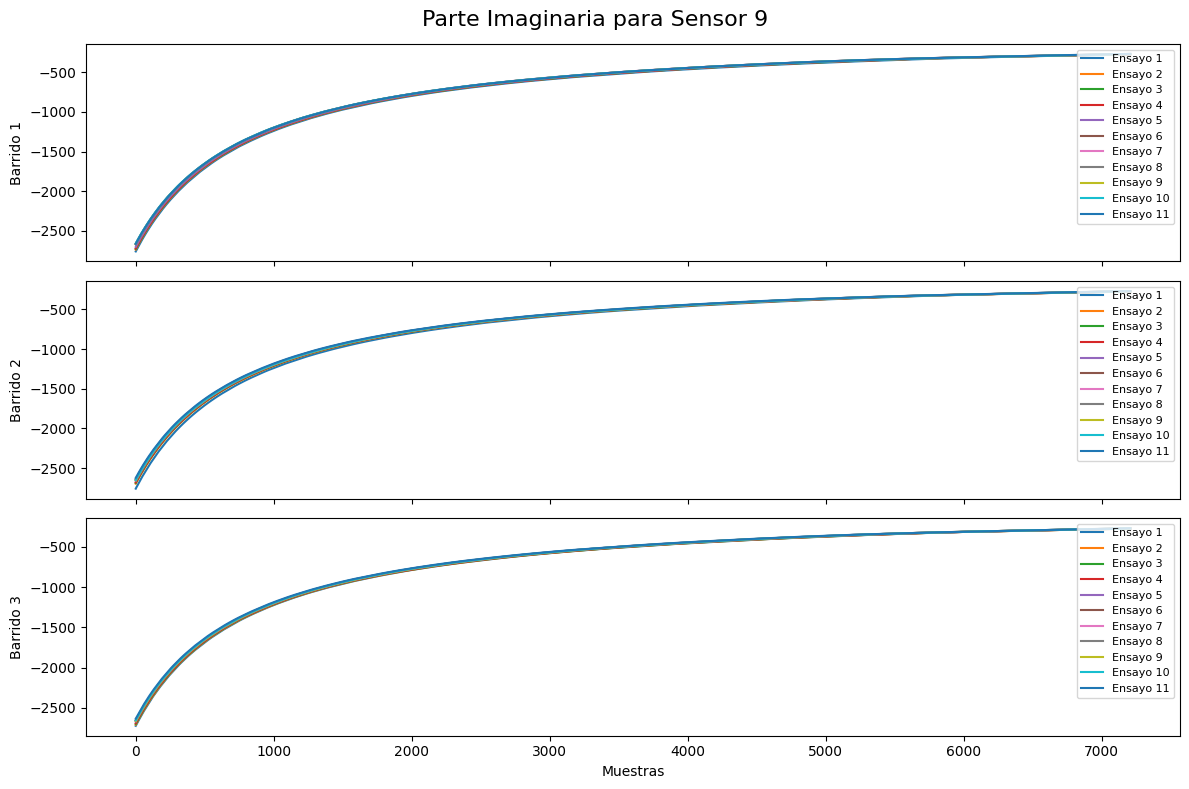

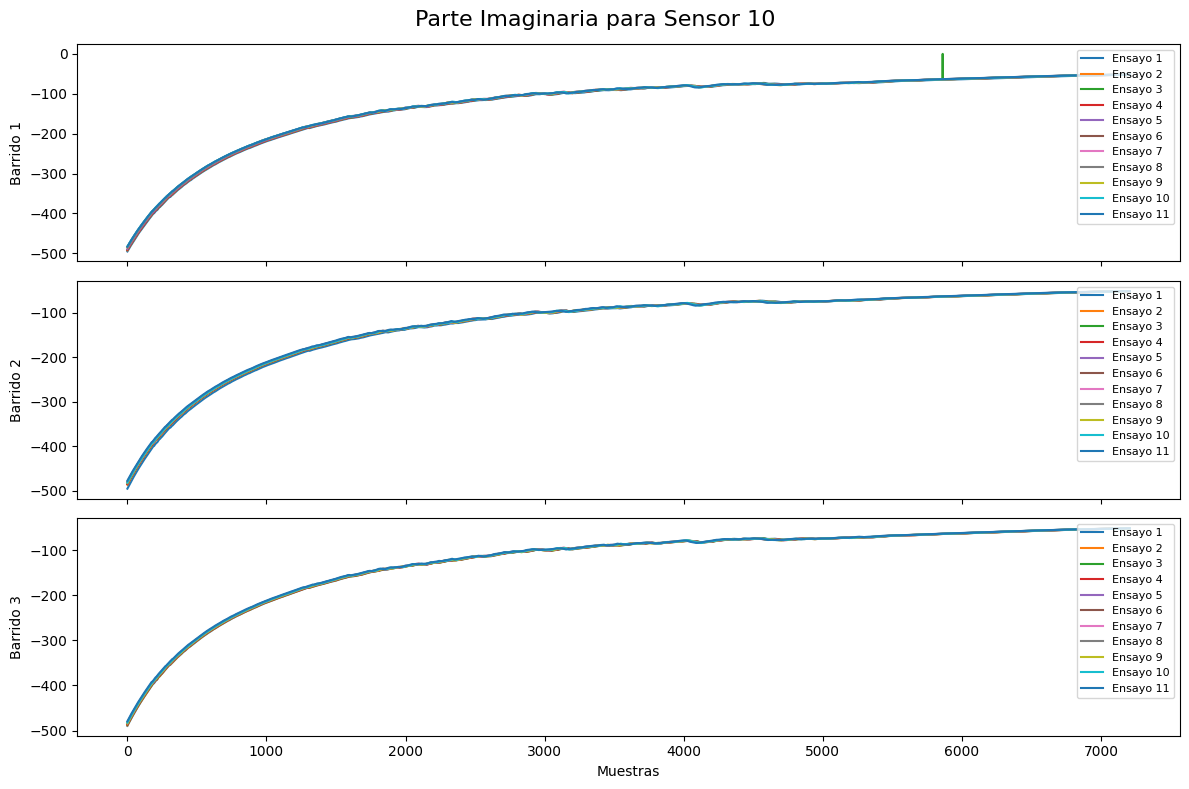

In [20]:
#Parte imaginaria
for sensor in range(n_sensores):
    fig, axs = plt.subplots(n_barridos, 1, figsize=(12, 8), sharex=True) # Creamos una figura con n_barridos subplots (uno por cada barrido).
    fig.suptitle(f"Parte Imaginaria para Sensor {sensor+1}", fontsize=16)
    
    # Iteramos sobre cada barrido
    for barrido in range(n_barridos):
        ax = axs[barrido]  
        for ensayo in range(n_ensayos):
            ax.plot(data_partes_imagin_np_reshaped[ensayo, barrido, sensor, :], label=f"Ensayo {ensayo+1}")
        
        ax.set_ylabel(f"Barrido {barrido+1}")
        ax.legend(fontsize=8, loc="upper right")
    
    axs[-1].set_xlabel("Muestras")
    plt.tight_layout()
    plt.show()